# Give Me Some Credit

In [1]:
# Import libraries and packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read in Data
train = pd.read_csv(r"/Users/emmanuel/Documents/Portfolio Projects/GiveMeSomeCredit/cs-training.csv").drop(['Unnamed: 0'],axis=1)
test = pd.read_csv(r"/Users/emmanuel/Documents/Portfolio Projects/GiveMeSomeCredit/cs-test.csv").drop(['Unnamed: 0'],axis=1)

## Data Prep + Exploratory Analysis

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [4]:
train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [5]:
# Count number of duplicate rows
n_rows = len(train)
dup_mask_all = train.duplicated(keep="first")
n_dup_all = int(dup_mask_all.sum())

print(f"Exact duplicate rows: {n_dup_all} ({n_dup_all/n_rows:.2%})")

Exact duplicate rows: 609 (0.41%)


In [6]:
# Dropping duplicates
train = train.drop_duplicates(keep="first").reset_index(drop=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         120170 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    145563 non-null  float64
dtype

### Missing Values Analysis

In [7]:
# Function to calculate missing values by column 
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # Make a table with the results 
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns= {0: 'Missing Values', 1 : '% of Total Values'})

    # Sort the table by percentage of missing descending 
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)

    # Print some summary information 
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns. \n"
           "There are " + str(mis_val_table_ren_columns.shape[0]) +
           " columns that have missing values.")
    
    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [8]:
missing_values = missing_values_table(train)
missing_values

Your selected dataframe has 11 columns. 
There are 2 columns that have missing values.


,Missing Values,% of Total Values
MonthlyIncome,29221,19.6
NumberOfDependents,3828,2.6


#### Relationship between Missing Values

In [9]:
# Create binary flags for missingness
train['Missing_MonthlyIncome'] = train['MonthlyIncome'].isna().astype(int)
train['Missing_Dependents'] = train['NumberOfDependents'].isna().astype(int)

In [10]:
# Cross-tab to see overlap
ct = pd.crosstab(train['Missing_MonthlyIncome'], train['Missing_Dependents'], margins=True)
print("Cross-tabulation of Missing Values:\n")
display(ct)

Cross-tabulation of Missing Values:



Missing_Dependents,0,1,All
Missing_MonthlyIncome,,,
0,120170,0,120170
1,25393,3828,29221
All,145563,3828,149391


Number of Dependents is missing and Monthly income is also missing for the same application this could be a link between customers unwilling to provide Number of Dependents when they have no monthly income. Hence Missingness is not random but may be tied to financial instability or data reluctance.

#### Impact of Missing Income on Default Risk

In [11]:
# Replace 'SeriousDlqin2yrs' with your target variable if different
default_rate = train.groupby('Missing_MonthlyIncome')['SeriousDlqin2yrs'].mean()

print("Default rate by income missingness:\n", default_rate)


Default rate by income missingness:
 Missing_MonthlyIncome
0    0.069527
1    0.056603
Name: SeriousDlqin2yrs, dtype: float64


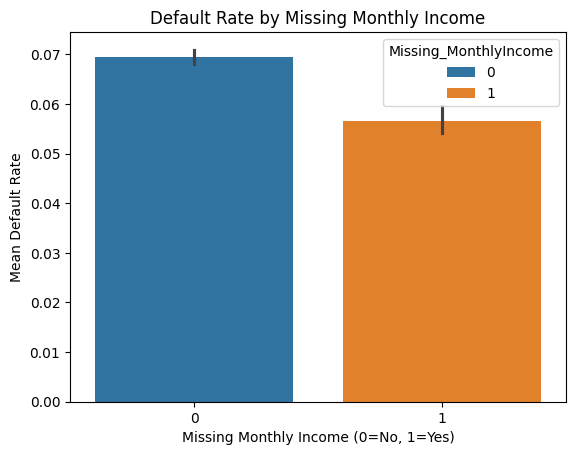

In [12]:
sns.barplot(x='Missing_MonthlyIncome', y='SeriousDlqin2yrs', data=train, hue='Missing_MonthlyIncome')
plt.title("Default Rate by Missing Monthly Income")
plt.xlabel("Missing Monthly Income (0=No, 1=Yes)")
plt.ylabel("Mean Default Rate")
plt.show()


Applicants with missing MonthlyIncome values actually shows a slighly lower default rate than those who reported an income.

#### Handling Missing Values

In [13]:
# Median imputation for missing values 
monthly_income_median = train['MonthlyIncome'].median()
NumberOfDependents_median = train['NumberOfDependents'].median()

# Fill missing values 
train['MonthlyIncome_NoMissing'] = train['MonthlyIncome'].fillna(monthly_income_median)
train['NumberOfDependents_NoMissing'] = train['NumberOfDependents'].fillna(NumberOfDependents_median)

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 15 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         120170 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    145563 non-null  float64
 11  

Applied median imputation for both MonthlyIncome and NumberofDependents to handle missing values. Binary indicators are retained to capture missingness pattern.

## Exploratory Data Analysis

### Target Variable Analysis - SeriousDlqin2yrs

In [14]:
# Target Distribution
target_counts = train['SeriousDlqin2yrs'].value_counts()
target_percent = train['SeriousDlqin2yrs'].value_counts(normalize=True)*100

print("Target Variable Distribution:")
display(pd.DataFrame({
    'Count': target_counts,
    'Percentage': target_percent.map("{:.2f}%".format)
}))


Target Variable Distribution:


,Count,Percentage
SeriousDlqin2yrs,,
0,139382,93.30%
1,10009,6.70%


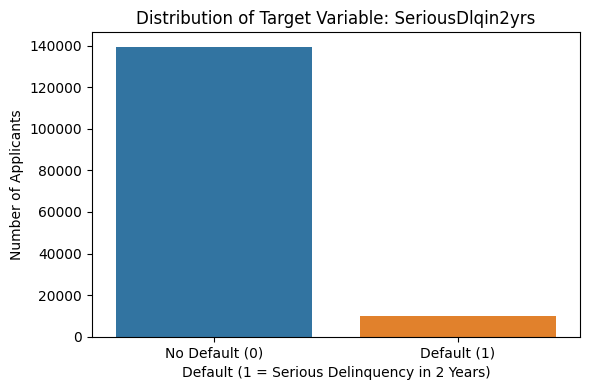

In [15]:
# --- Visualization ---
plt.figure(figsize=(6,4))
sns.barplot(x=target_counts.index.astype(str), y=target_counts.values, hue=target_counts.index.astype(str))
plt.title("Distribution of Target Variable: SeriousDlqin2yrs")
plt.xlabel("Default (1 = Serious Delinquency in 2 Years)")
plt.ylabel("Number of Applicants")
plt.xticks([0, 1], ['No Default (0)', 'Default (1)'])
plt.tight_layout()
plt.show()


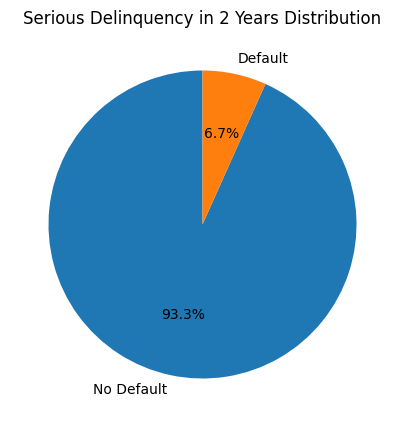

In [16]:
plt.figure(figsize=(5,5))
plt.pie(target_counts, labels=['No Default', 'Default'], autopct='%1.1f%%', startangle=90)
plt.title("Serious Delinquency in 2 Years Distribution")
plt.show()


Strong class imbalance: The imbalance means that a naive model prediciting no default for everyone would already achieve a high accracy of 93%, but would fail to identify actaul defaults. 

### Age Distribution

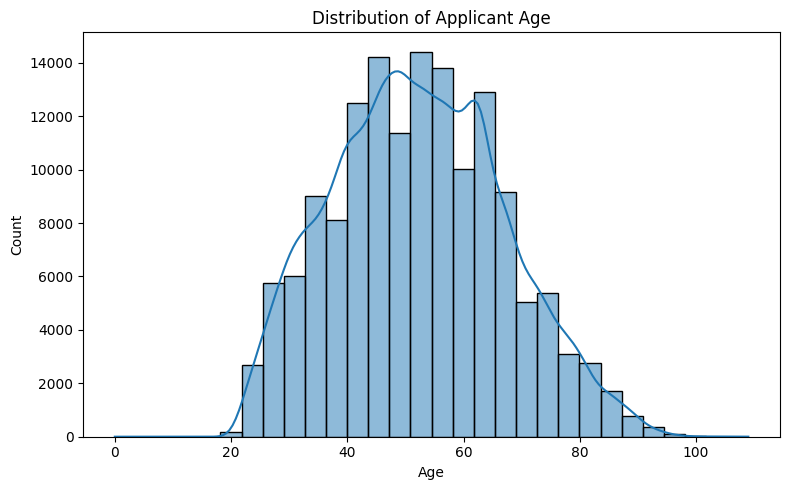

In [17]:
plt.figure(figsize=(8,5))
sns.histplot(train['age'], bins=30, kde=True)
plt.title("Distribution of Applicant Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [18]:
print(train['age'].describe())

count    149391.000000
mean         52.306237
std          14.725962
min           0.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64


Average applicant age is around 52 years, with most people between 40 and 63. The distributuion is roughly bell-shaped (normally distributed), centeres near the 50s, indicating a well-spread age demographic.

However, there are some outliers: The minimum age is 0, which is obvioulsy invalid and very old ages above >100 are likely data errors

#### Handling Outliers in Age

In [19]:
# Valid Age Ranges
valid_age_min = 18
valid_age_max = 100

In [20]:
# Create an outlier flag for modelling
train['Age_Outlier'] = ((train['age'] < valid_age_min) | (train['age'] > valid_age_max)).astype(int)

# Replace out-of-range ages with NaN
train.loc[train['Age_Outlier'] == 1, 'age'] = np.nan

# Impute missing ages with median
age_median = train['age'].median()
train['age_imputed'] = train['age'].fillna(age_median)

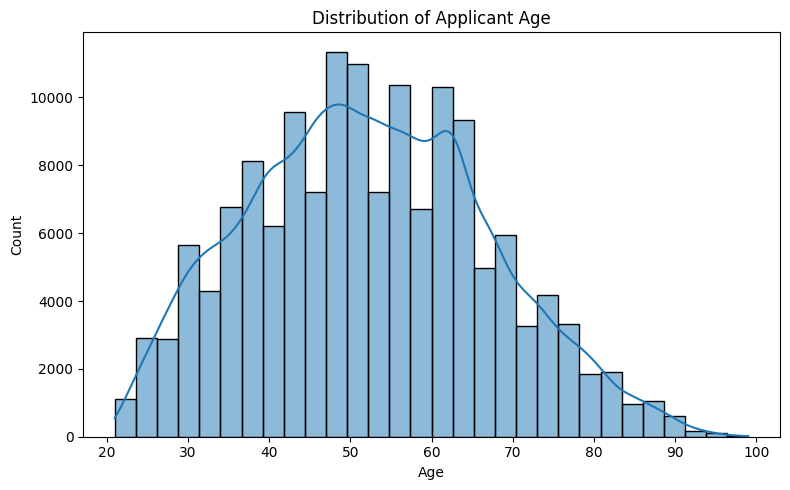

In [21]:
plt.figure(figsize=(8,5))
sns.histplot(train['age_imputed'], bins=30, kde=True)
plt.title("Distribution of Applicant Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


The distribution remains approximately normal, centered around age 50 - 55. Most applicants are between 30 and 70 years old, with fewer very young or elderly individuals. The majority of applicants are in their prime working yars, suggesting a typical credit active population.

#### Default Rate by Age Group

In [22]:
# Define age bins and labels
age_bins = [18, 30, 40, 50, 60, 70 , 80, 100]
age_labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']

# Create age group variable 
train['AgeGroup'] = pd.cut(train['age_imputed'], bins=age_bins, labels=age_labels, right=False)

# Default rate per group
age_default_rate = (train.groupby('AgeGroup', observed=False)['SeriousDlqin2yrs'].mean().reset_index().rename(columns={'SeriousDlqin2yrs': 'DefaultRate'}))

display(age_default_rate)

,AgeGroup,DefaultRate
0,18-29,0.119178
1,30-39,0.100830
2,40-49,0.083753
3,50-59,0.064548
4,60-69,0.036438
5,70-79,0.024477
6,80+,0.020626


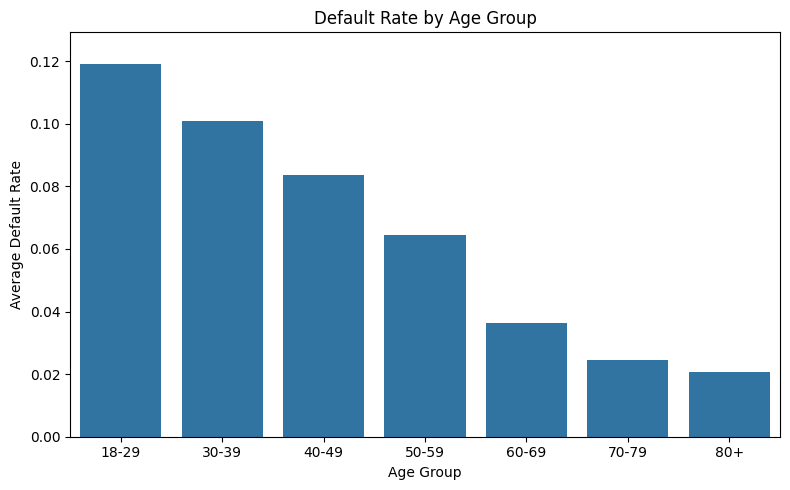

In [23]:
# Visualise Default Rate by Age Group
plt.figure(figsize=(8,5))
sns.barplot(data=age_default_rate, x='AgeGroup', y='DefaultRate')
plt.title("Default Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Default Rate")
plt.ylim(0, age_default_rate['DefaultRate'].max() + 0.01)
plt.tight_layout()
plt.show()

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 18 columns):
 #   Column                                Non-Null Count   Dtype   
---  ------                                --------------   -----   
 0   SeriousDlqin2yrs                      149391 non-null  int64   
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64 
 2   age                                   149377 non-null  float64 
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64   
 4   DebtRatio                             149391 non-null  float64 
 5   MonthlyIncome                         120170 non-null  float64 
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64   
 7   NumberOfTimes90DaysLate               149391 non-null  int64   
 8   NumberRealEstateLoansOrLines          149391 non-null  int64   
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64   
 10  NumberOfDependents                    145563 non-null  f

The default rate is highest among younger applicants (ages 18-39).

It gradually decreases with age.

Younger borrowers have less credit history and higher financial volatility, leading to greater default risk.

Older applicants tend to have more established financial behaviour and stability resulting in lower deliquincey rates.

Age is a strong predictor of credit risk and should be retaines as a key model feature.

However model should avoid unfair bias.



#### Monthly Income Distribution 

In [25]:
# Creating Income Bands
bins = [-1, 0, 2000, 4000, 6000, 8000, 10000, 15000, 20000, 50000, train['MonthlyIncome_NoMissing'].max()]
labels = ['0 income', '<2k', '2k-4k', '4k-6k', '6k-8k', '8k-10k', '10k-15k', '15k-20k', '20k-50k', '50k+']

train['MonthlyIncomeBands'] = pd.cut(train['MonthlyIncome_NoMissing'], bins=bins, labels=labels, right=False)

# Count & Default Rate
income_summary = (train.groupby('MonthlyIncomeBands', observed=True).agg(ApplicantCount=('SeriousDlqin2yrs', 'count'), DefaultRate = ('SeriousDlqin2yrs', 'mean')).reset_index())

display(income_summary)

,MonthlyIncomeBands,ApplicantCount,DefaultRate
0,<2k,10794,0.084491
1,2k-4k,27399,0.093033
2,4k-6k,58069,0.065336
3,6k-8k,20551,0.060386
4,8k-10k,12793,0.051356
5,10k-15k,14076,0.041986
6,15k-20k,3380,0.042604
7,20k-50k,2008,0.050797
8,50k+,320,0.059375


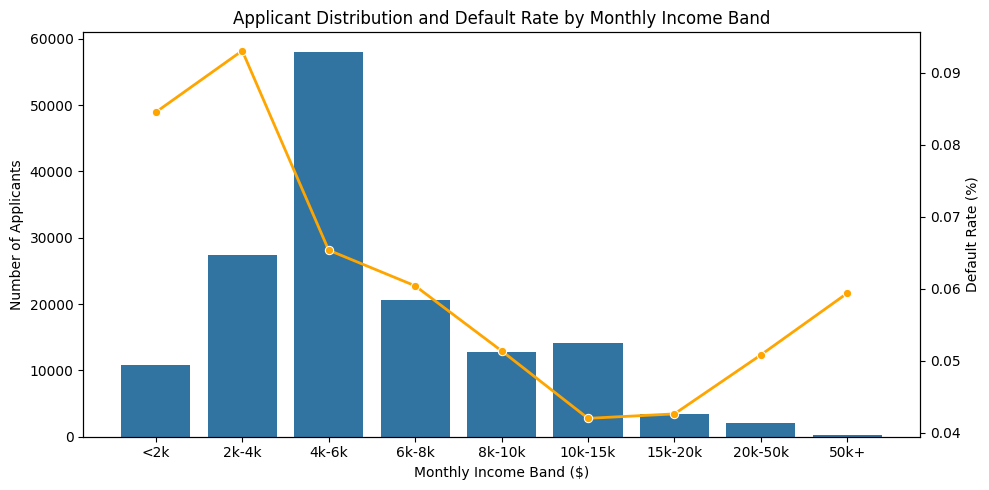

In [26]:
fig, ax1 = plt.subplots(figsize=(10,5))

# Bar Plot for applicant count 
sns.barplot(x='MonthlyIncomeBands', y='ApplicantCount', data=income_summary, ax=ax1)
ax1.set_xlabel("Monthly Income Band ($)")
ax1.set_ylabel("Number of Applicants")
ax1.tick_params(axis='y')
ax1.set_title("Applicant Distribution and Default Rate by Monthly Income Band")

# Line plot for default rate 
ax2 = ax1.twinx()
sns.lineplot(x='MonthlyIncomeBands', y='DefaultRate', data=income_summary, marker='o', linewidth=2, ax=ax2, color='Orange')
ax2.set_ylabel("Default Rate (%)")
ax2.tick_params(axis='y')

plt.tight_layout()
plt.show()

The majority of applicants fall between the $2,000-$8,000/month income range, reflecting a middle-income segment.

As income rises, the default rate steadily decreases, suggesting that higher-income applicants have more financial stability and better repayment capacity.

For very high-income bands (>$20,000), the default rate appears to flatten or vary due to the smaller sample size in these categories.

#### Handling Outliers in Monthly Income

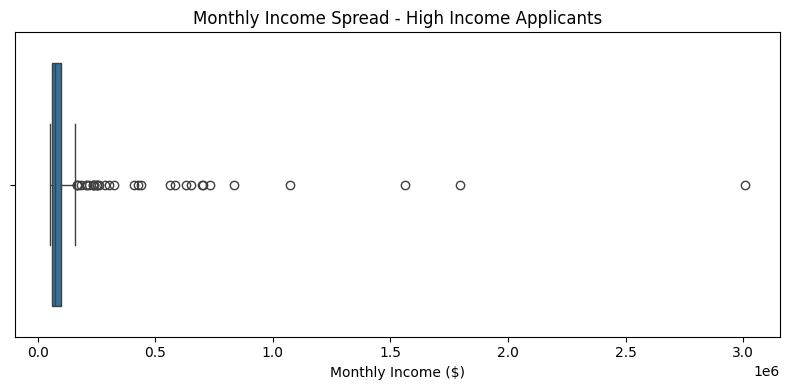

In [27]:
high_income = train[train['MonthlyIncome_NoMissing'] > 50000].copy()

plt.figure(figsize=(8,4))
sns.boxplot(x=high_income['MonthlyIncome_NoMissing'], showfliers=True)
plt.title("Monthly Income Spread - High Income Applicants")
plt.xlabel("Monthly Income ($)")
plt.tight_layout()
plt.show()

In [28]:
p95_hi = high_income['MonthlyIncome_NoMissing'].quantile(0.95)
p99_hi = high_income['MonthlyIncome_NoMissing'].quantile(0.99)
mean_hi = high_income['MonthlyIncome_NoMissing'].mean()

print(f"High-Income 95th percentile: ${p95_hi:,.0f}")
print(f"High-Income 99th percentile: ${p99_hi:,.0f}")
print(f"High-Income mean: ${mean_hi:,.0f}")

High-Income 95th percentile: $324,000
High-Income 99th percentile: $1,072,500
High-Income mean: $128,875


In [29]:
# Flag for extreme values within high income group
train['ExtremeIncomeFlag'] = 0
train.loc[train['MonthlyIncome_NoMissing'] > p95_hi, 'ExtremeIncomeFlag'] = 1

# Impute those with the global mean 
impute_value = train['MonthlyIncome_NoMissing'].mean()
train['MonthlyIncome_imputed'] = np.where(train['ExtremeIncomeFlag'] == 1, impute_value, train['MonthlyIncome_NoMissing'])
train['Missing_MonthlyIncome_Imputed'] = np.where(train['ExtremeIncomeFlag'] == 1, impute_value, train['MonthlyIncome'])

print(f"Imputed {train['ExtremeIncomeFlag'].sum()} extreme high-income records with ${impute_value:,.0f}")

Imputed 15 extreme high-income records with $6,426


The 95th percentile of the high income group was $324,000/month. Records that exceeded this were considered extreme values. However $324,000 is still very high and we will come back later after modelling to see the impact of these extreme values.

The imputation corrected 15 extreme records

#### Revolving Utilsation of Unsecured Lines

In [30]:
train['RevolvingUtilizationOfUnsecuredLines'].describe()

count    149391.000000
mean          6.071087
std         250.263672
min           0.000000
25%           0.030132
50%           0.154235
75%           0.556494
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [31]:
extremeoutliers = train[train['RevolvingUtilizationOfUnsecuredLines'] > 2].copy()
extremeoutliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 371 entries, 293 to 149319
Data columns (total 22 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   SeriousDlqin2yrs                      371 non-null    int64   
 1   RevolvingUtilizationOfUnsecuredLines  371 non-null    float64 
 2   age                                   371 non-null    float64 
 3   NumberOfTime30-59DaysPastDueNotWorse  371 non-null    int64   
 4   DebtRatio                             371 non-null    float64 
 5   MonthlyIncome                         278 non-null    float64 
 6   NumberOfOpenCreditLinesAndLoans       371 non-null    int64   
 7   NumberOfTimes90DaysLate               371 non-null    int64   
 8   NumberRealEstateLoansOrLines          371 non-null    int64   
 9   NumberOfTime60-89DaysPastDueNotWorse  371 non-null    int64   
 10  NumberOfDependents                    356 non-null    float64 
 11  Missin

In [32]:
# Flagging Outliers
train['ExtremeRevolving_flag'] = (train['RevolvingUtilizationOfUnsecuredLines'] > 2).astype(int)

# Impute extreme values with mean 
mean_2 = train.loc[train['RevolvingUtilizationOfUnsecuredLines'] <= 2, 'RevolvingUtilizationOfUnsecuredLines'].mean()

train['RevolvingUtilization_cleaned'] = np.where(train['RevolvingUtilizationOfUnsecuredLines'] > 2, mean_2, train['RevolvingUtilizationOfUnsecuredLines'])


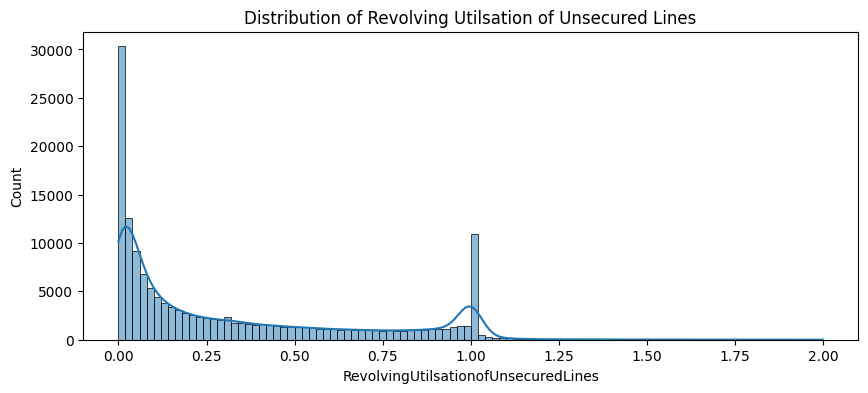

In [33]:
plt.figure(figsize=(10,4))
sns.histplot(train['RevolvingUtilization_cleaned'], bins=100, kde=True)
plt.title('Distribution of Revolving Utilsation of Unsecured Lines')
plt.xlabel('RevolvingUtilsationofUnsecuredLines')
plt.show()

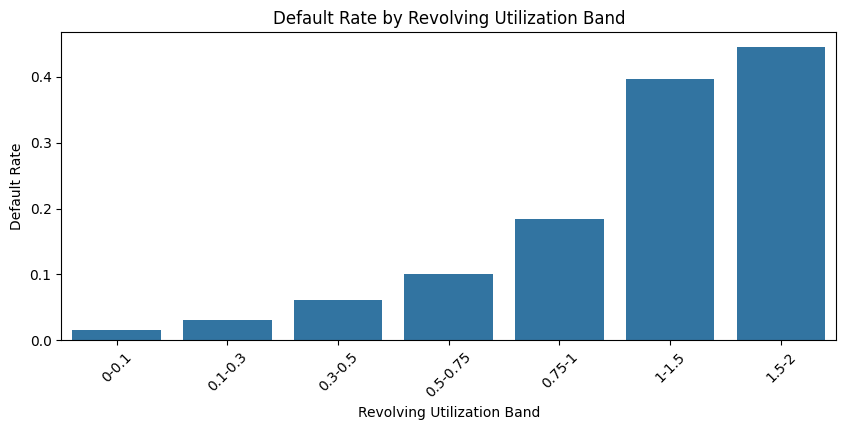

In [34]:
train['RevolvingUtilizationBand'] = pd.cut(train['RevolvingUtilization_cleaned'],
    bins=[0, 0.1, 0.3, 0.5, 0.75, 1, 1.5, 2],
    labels=['0-0.1','0.1-0.3','0.3-0.5','0.5-0.75','0.75-1','1-1.5','1.5-2']
)

default_rates = train.groupby('RevolvingUtilizationBand', observed=True)['SeriousDlqin2yrs'].mean().reset_index()

plt.figure(figsize=(10,4))
sns.barplot(x='RevolvingUtilizationBand', y='SeriousDlqin2yrs', data=default_rates)
plt.title('Default Rate by Revolving Utilization Band')
plt.ylabel('Default Rate')
plt.xlabel('Revolving Utilization Band')
plt.xticks(rotation=45)
plt.show()


Heavily right skewed

Default rates tend to increase sharply as utilisation rises

Applicants with utilisation above 1.0 shows notably higher default rate

#### DebtRatio Distribution

In [35]:
train['DebtRatio'].describe()

count    149391.000000
mean        354.436740
std        2041.843455
min           0.000000
25%           0.177441
50%           0.368234
75%           0.875279
max      329664.000000
Name: DebtRatio, dtype: float64

In [36]:
# Handling Outliers
# Flag outliers
train['ExtremeDebtRatio_flag'] = (train['DebtRatio'] > 5).astype(int)

# Cap extreme values at 5
train['DebtRatio_cleaned'] = train['DebtRatio'].clip(upper=5)

In [37]:
train['DebtRatio_cleaned'].describe()

count    149391.000000
mean          1.291980
std           1.886484
min           0.000000
25%           0.177441
50%           0.368234
75%           0.875279
max           5.000000
Name: DebtRatio_cleaned, dtype: float64

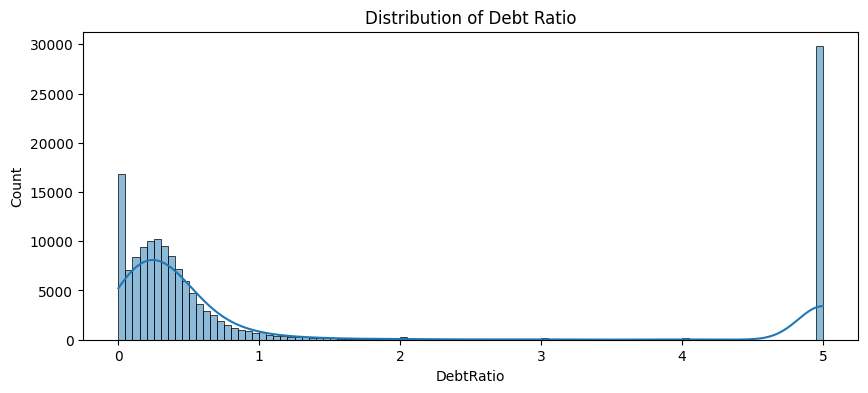

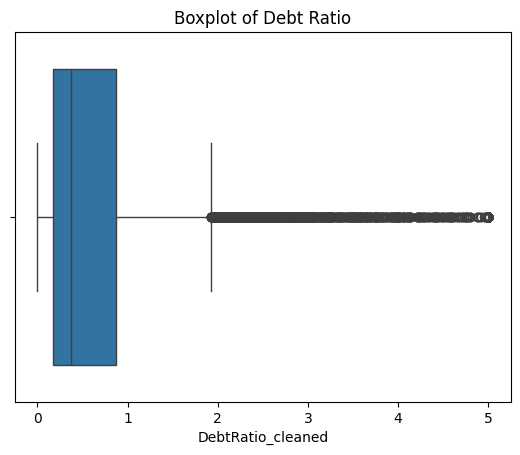

In [38]:
plt.figure(figsize=(10,4))
sns.histplot(train['DebtRatio_cleaned'], bins=100, kde=True)
plt.title('Distribution of Debt Ratio')
plt.xlabel('DebtRatio')
plt.show()

sns.boxplot(x=train['DebtRatio_cleaned'])
plt.title('Boxplot of Debt Ratio')
plt.show()

The histogram shows a heavily right-skewed distribution of DebtRatio.

Most applicants have values below 1, indicating that their monthly debt payments are within their monthly income capacity.

The dataset contains numerous cases of either very low or extremely high debt ratios.

The capping at 5.0 effectively prevents extreme distortion while preserving the natural right-skew.

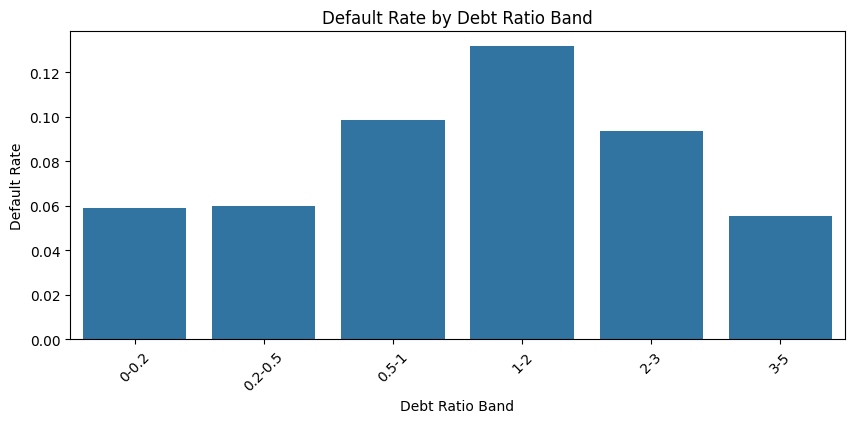

In [39]:
train['DebtRatioBand'] = pd.cut(train['DebtRatio_cleaned'],
    bins=[0, 0.2, 0.5, 1, 2, 3, 5],
    labels=['0-0.2','0.2-0.5','0.5-1','1-2','2-3','3-5'])

default_rates = (train.groupby('DebtRatioBand', observed=False)['SeriousDlqin2yrs'].mean().reset_index())


plt.figure(figsize=(10,4))
sns.barplot(x='DebtRatioBand', y='SeriousDlqin2yrs', data=default_rates)
plt.title('Default Rate by Debt Ratio Band')
plt.ylabel('Default Rate')
plt.xlabel('Debt Ratio Band')
plt.xticks(rotation=45)
plt.show()

The default rate increases as DebtRatio rises up to the 1–2 range, indicating a clear relationship between higher debt burden and delinquency.

The slight decline beyond a ratio of 2 likely reflects noise from data capping or smaller sample sizes rather than a true drop in risk.

Overall, DebtRatio is an important predictor of credit risk, but it should be handled carefully due to extreme skewness and capped outliers.

#### Number Of Times 90 Days Late Distribution

In [40]:
train['NumberOfTimes90DaysLate'].describe()

count    149391.000000
mean          0.238120
std           3.826165
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          98.000000
Name: NumberOfTimes90DaysLate, dtype: float64

The vast majority of applicants have never been 90+ days late.

In [41]:
# Flag outliers
train['Extreme90DaysLate_flag'] = (train['NumberOfTimes90DaysLate'] > 6).astype(int)

# Cap values at 10
train['NumberOfTimes90DaysLate_cleaned'] = train['NumberOfTimes90DaysLate'].clip(upper=6)


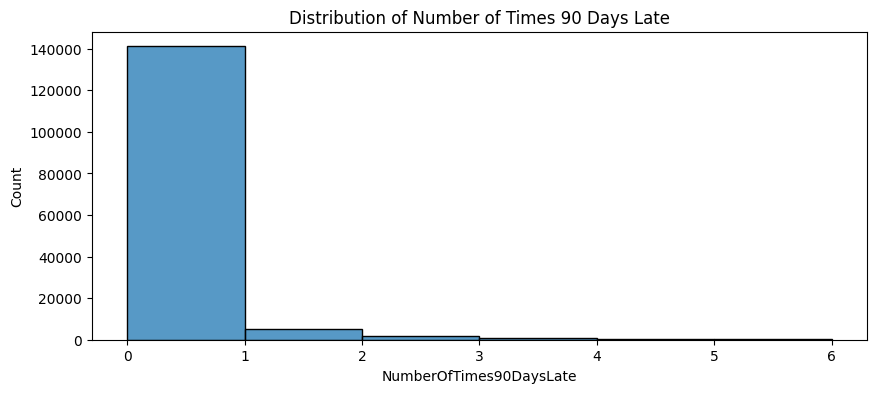

In [42]:
plt.figure(figsize=(10,4))
sns.histplot(train['NumberOfTimes90DaysLate_cleaned'], bins=range(0,7), kde=False)
plt.title('Distribution of Number of Times 90 Days Late')
plt.xlabel('NumberOfTimes90DaysLate')
plt.ylabel('Count')
plt.show()

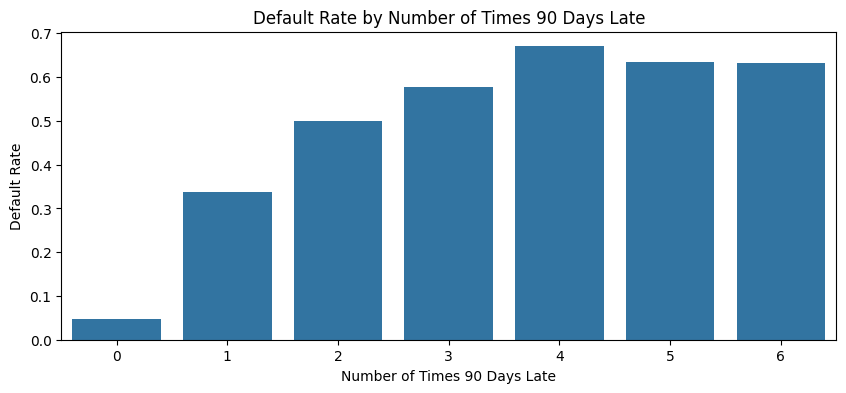

In [43]:
default_rates = (train.groupby('NumberOfTimes90DaysLate_cleaned', observed=False)['SeriousDlqin2yrs'].mean().reset_index())

plt.figure(figsize=(10,4))
sns.barplot(x='NumberOfTimes90DaysLate_cleaned', y='SeriousDlqin2yrs', data=default_rates)
plt.title('Default Rate by Number of Times 90 Days Late')
plt.ylabel('Default Rate')
plt.xlabel('Number of Times 90 Days Late')
plt.show()

Even one 90-day late payment increases the probability of default by more than sixfold compared to those with none.

Borrowers with 3 or more delinquencies are extremely high risk, with default rates exceeding 60%.

The slight dip at 6 delinquencies likely results from a small sample size rather than improved performance.

#### Number Of Time 60-89 Days Past Due Not Worse Distribution

In [44]:
train['NumberOfTime60-89DaysPastDueNotWorse'].describe()

count    149391.000000
mean          0.212503
std           3.810523
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          98.000000
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: float64

Over 90% of applicants have never been 60–89 days late.

In [45]:
# Flag implausible values
train['Extreme60DaysLate_flag'] = (train['NumberOfTime60-89DaysPastDueNotWorse'] > 6).astype(int)

# Cap extreme values
train['NumberOfTime60-89DaysPastDueNotWorse_cleaned'] = train['NumberOfTime60-89DaysPastDueNotWorse'].clip(upper=6)

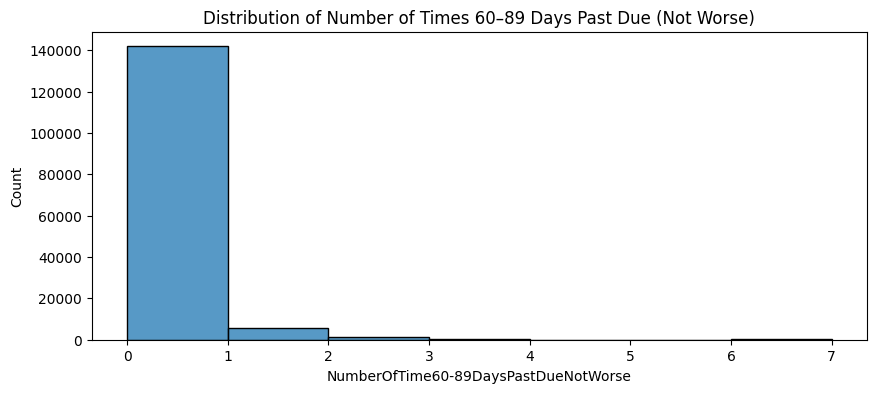

In [46]:
plt.figure(figsize=(10,4))
sns.histplot(train['NumberOfTime60-89DaysPastDueNotWorse_cleaned'], bins=range(0,8), kde=False)
plt.title('Distribution of Number of Times 60–89 Days Past Due (Not Worse)')
plt.xlabel('NumberOfTime60-89DaysPastDueNotWorse')
plt.ylabel('Count')
plt.show()

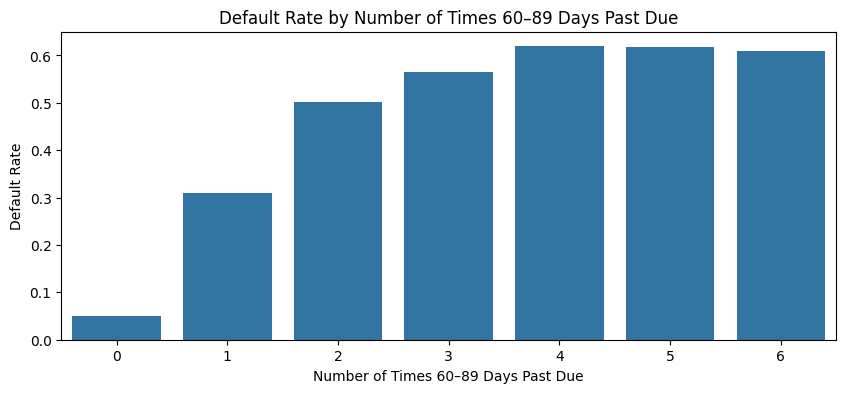

In [47]:
default_rates = (train.groupby('NumberOfTime60-89DaysPastDueNotWorse_cleaned', observed=False)['SeriousDlqin2yrs'].mean().reset_index())

plt.figure(figsize=(10,4))
sns.barplot(x='NumberOfTime60-89DaysPastDueNotWorse_cleaned', y='SeriousDlqin2yrs', data=default_rates)
plt.title('Default Rate by Number of Times 60–89 Days Past Due')
plt.ylabel('Default Rate')
plt.xlabel('Number of Times 60–89 Days Past Due')
plt.show()


There is a strong positive relationship between the number of 60–89-day delinquencies and default probability.

#### NumberOfTime30-59DaysPastDueNotWorse

In [48]:
train['NumberOfTime30-59DaysPastDueNotWorse'].describe()

count    149391.000000
mean          0.393886
std           3.852953
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          98.000000
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: float64

In [49]:
# Flag implausible values
train['Extreme30DaysLate_flag'] = (train['NumberOfTime30-59DaysPastDueNotWorse'] > 6).astype(int)

# Cap extreme values at 6
train['NumberOfTime30-59DaysPastDueNotWorse_cleaned'] = train['NumberOfTime30-59DaysPastDueNotWorse'].clip(upper=6)

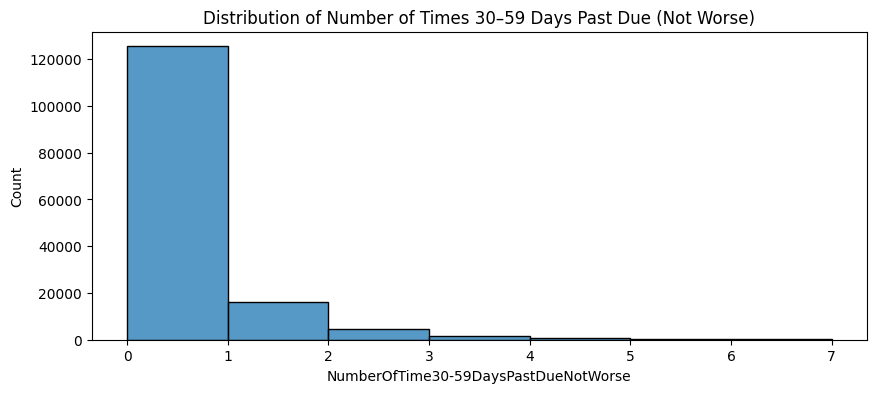

In [50]:
plt.figure(figsize=(10,4))
sns.histplot(train['NumberOfTime30-59DaysPastDueNotWorse_cleaned'], bins=range(0,8), kde=False)
plt.title('Distribution of Number of Times 30–59 Days Past Due (Not Worse)')
plt.xlabel('NumberOfTime30-59DaysPastDueNotWorse')
plt.ylabel('Count')
plt.show()

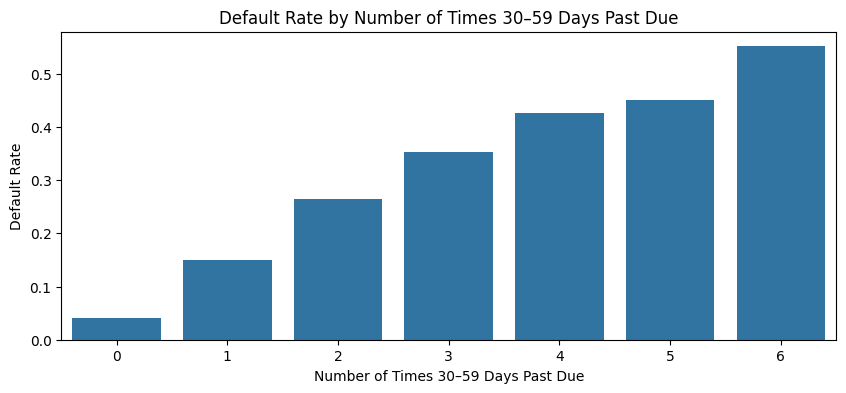

In [51]:
default_rates = (train.groupby('NumberOfTime30-59DaysPastDueNotWorse_cleaned', observed=False)['SeriousDlqin2yrs'].mean().reset_index())

plt.figure(figsize=(10,4))
sns.barplot(x='NumberOfTime30-59DaysPastDueNotWorse_cleaned', y='SeriousDlqin2yrs', data=default_rates)
plt.title('Default Rate by Number of Times 30–59 Days Past Due')
plt.ylabel('Default Rate')
plt.xlabel('Number of Times 30–59 Days Past Due')
plt.show()

There is a clear positive relationship between the number of 30–59 day delinquencies and the default rate.

#### Number of Open Credit Lines and Loans

In [52]:
train['NumberOfOpenCreditLinesAndLoans'].describe()

count    149391.000000
mean          8.480892
std           5.136515
min           0.000000
25%           5.000000
50%           8.000000
75%          11.000000
max          58.000000
Name: NumberOfOpenCreditLinesAndLoans, dtype: float64

Most applicants have between 5 and 12 open accounts, indicating a reasonable level of credit activity.

A small number of cases exceed 30 open lines, which is unrealistic for typical consumers and likely reporting anomalies.

In [53]:
# Flag potential outliers
train['ExtremeOpenLines_flag'] = (train['NumberOfOpenCreditLinesAndLoans'] > 30).astype(int)

# Cap values at 30
train['NumberOfOpenCreditLinesAndLoans_cleaned'] = train['NumberOfOpenCreditLinesAndLoans'].clip(upper=30)

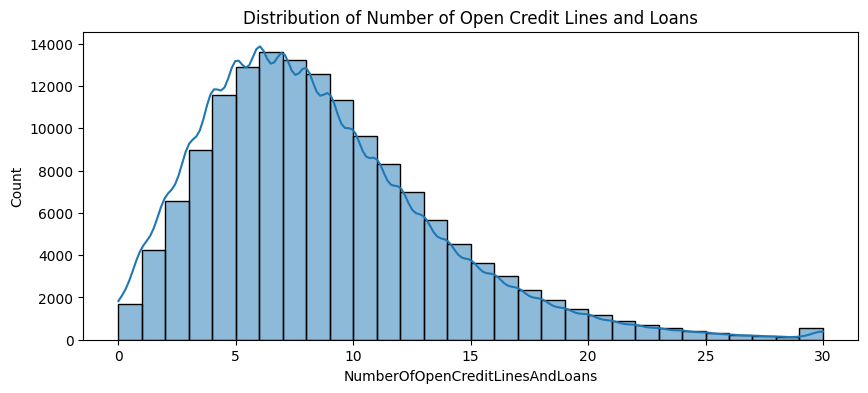

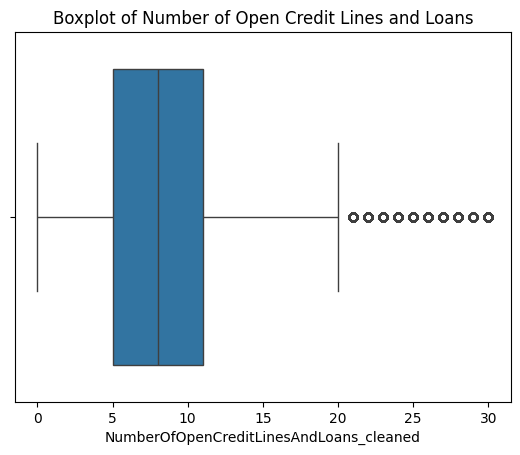

In [54]:
plt.figure(figsize=(10,4))
sns.histplot(train['NumberOfOpenCreditLinesAndLoans_cleaned'], bins=30, kde=True)
plt.title('Distribution of Number of Open Credit Lines and Loans')
plt.xlabel('NumberOfOpenCreditLinesAndLoans')
plt.ylabel('Count')
plt.show()

sns.boxplot(x=train['NumberOfOpenCreditLinesAndLoans_cleaned'])
plt.title('Boxplot of Number of Open Credit Lines and Loans')
plt.show()

The majority of values fall between 5 and 15 open lines.

A small cluster above 20 may reflect either highly leveraged borrowers or data errors.

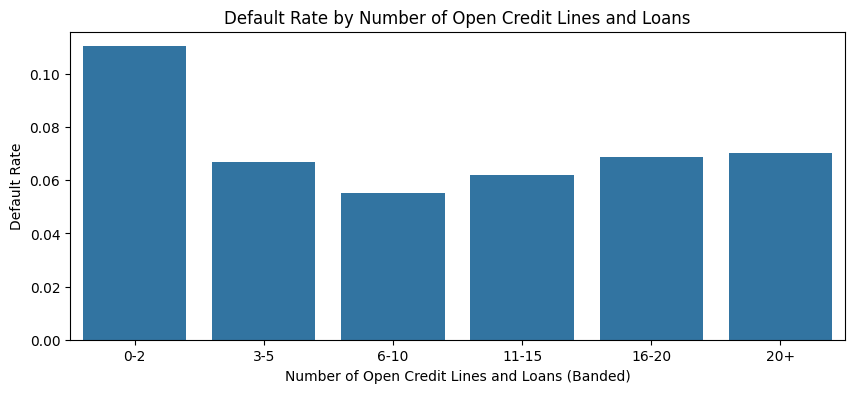

In [55]:
train['OpenLinesBand'] = pd.cut(train['NumberOfOpenCreditLinesAndLoans_cleaned'],
    bins=[0, 2, 5, 10, 15, 20, 30],
    labels=['0-2','3-5','6-10','11-15','16-20','20+']
)

default_rates = train.groupby('OpenLinesBand', observed=False)['SeriousDlqin2yrs'].mean().reset_index()

plt.figure(figsize=(10,4))
sns.barplot(x='OpenLinesBand', y='SeriousDlqin2yrs', data=default_rates)
plt.title('Default Rate by Number of Open Credit Lines and Loans')
plt.ylabel('Default Rate')
plt.xlabel('Number of Open Credit Lines and Loans (Banded)')
plt.show()


Default rate tends to be higher among borrowers with very few open lines (0–2) — limited credit history or thin files.

Moderate portfolios (6–15 open lines) generally have the lowest default rates, reflecting balanced credit usage.

Default risk may rise again beyond 20 open lines, possibly due to overextension or high credit utilization.

#### Number Real Estate Loans Or Lines Distribution


In [56]:
train['NumberRealEstateLoansOrLines'].describe()

count    149391.000000
mean          1.022391
std           1.130196
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          54.000000
Name: NumberRealEstateLoansOrLines, dtype: float64

The majority of applicants have 0–2 real estate loans, consistent with typical mortgage ownership patterns.

In [57]:
# Flag outliers
train['ExtremeRealEstate_flag'] = (train['NumberRealEstateLoansOrLines'] > 5).astype(int)

# Cap extreme values at 5
train['NumberRealEstateLoansOrLines_cleaned'] = train['NumberRealEstateLoansOrLines'].clip(upper=5)

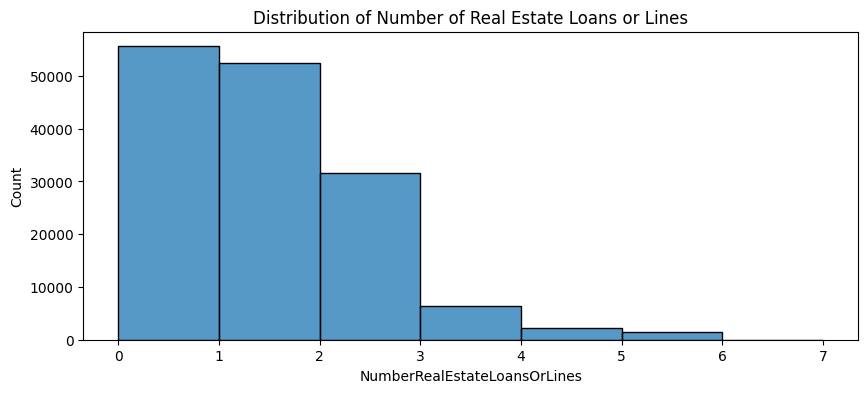

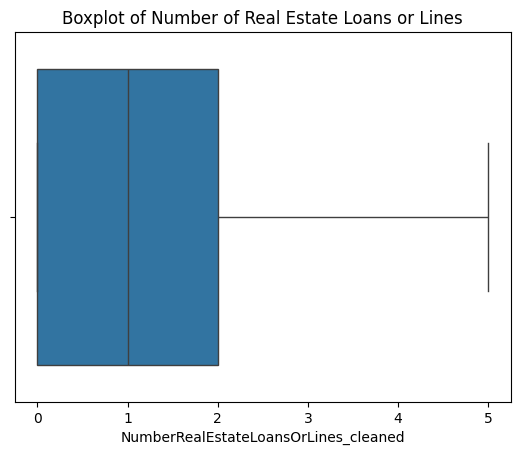

In [58]:
plt.figure(figsize=(10,4))
sns.histplot(train['NumberRealEstateLoansOrLines_cleaned'], bins=range(0,8), kde=False)
plt.title('Distribution of Number of Real Estate Loans or Lines')
plt.xlabel('NumberRealEstateLoansOrLines')
plt.ylabel('Count')
plt.show()

sns.boxplot(x=train['NumberRealEstateLoansOrLines_cleaned'])
plt.title('Boxplot of Number of Real Estate Loans or Lines')
plt.show()

The distribution is highly concentrated between 0 and 2, with a sharp drop-off beyond 3.

A large number of applicants have 0, reflecting renters or non-property owners.

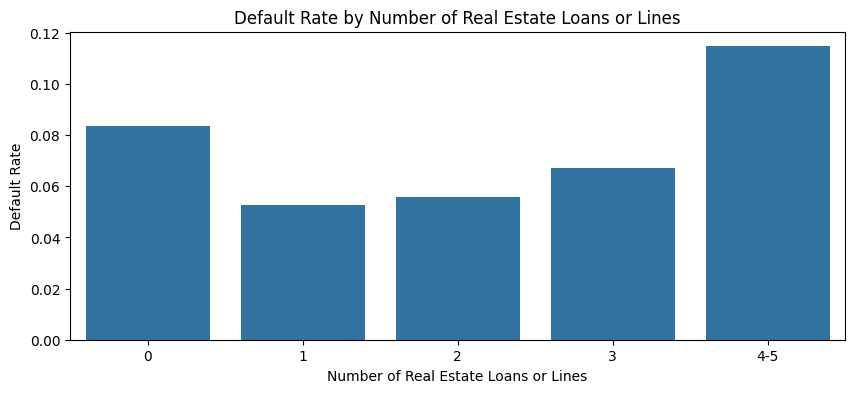

In [59]:
train['RealEstateBand'] = pd.cut(train['NumberRealEstateLoansOrLines_cleaned'],
    bins=[-1, 0, 1, 2, 3, 5],
    labels=['0','1','2','3','4-5']
)

default_rates = train.groupby('RealEstateBand', observed=False)['SeriousDlqin2yrs'].mean().reset_index()

plt.figure(figsize=(10,4))
sns.barplot(x='RealEstateBand', y='SeriousDlqin2yrs', data=default_rates)
plt.title('Default Rate by Number of Real Estate Loans or Lines')
plt.ylabel('Default Rate')
plt.xlabel('Number of Real Estate Loans or Lines')
plt.show()


Borrowers with 0 real estate loans often show higher default rates, reflecting lower asset ownership and financial stability.

Those with 1–2 loans (typical homeowners) generally have the lowest default risk — owning real estate is associated with stronger creditworthiness.

Default rates may rise again slightly for 4–5 loans, potentially due to over-leverage or property investors carrying higher debt loads.

#### Number Of Dependents Distribution

In [60]:
train['NumberOfDependents_NoMissing'].describe()

count    149391.000000
mean          0.740393
std           1.108272
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          20.000000
Name: NumberOfDependents_NoMissing, dtype: float64

In [61]:
# Flag extreme values
train['ExtremeDependents_flag'] = (train['NumberOfDependents_NoMissing'] > 5).astype(int)

# Cap values at 5
train['NumberOfDependents_cleaned'] = train['NumberOfDependents_NoMissing'].clip(upper=5)
train['NumberOfDependentsMissing_cleaned'] = train['NumberOfDependents'].clip(upper=5)

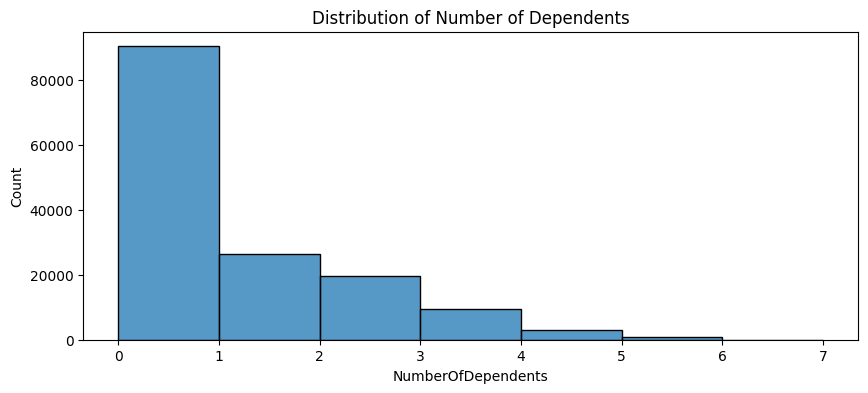

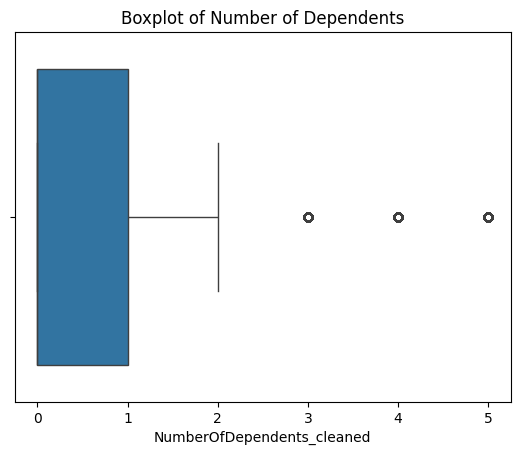

In [62]:
plt.figure(figsize=(10,4))
sns.histplot(train['NumberOfDependents_cleaned'], bins=range(0,8), kde=False)
plt.title('Distribution of Number of Dependents')
plt.xlabel('NumberOfDependents')
plt.ylabel('Count')
plt.show()

sns.boxplot(x=train['NumberOfDependents_cleaned'])
plt.title('Boxplot of Number of Dependents')
plt.show()

The majority of applicants have 0 or 1 dependent.

The frequency declines steadily as the number of dependents increases.

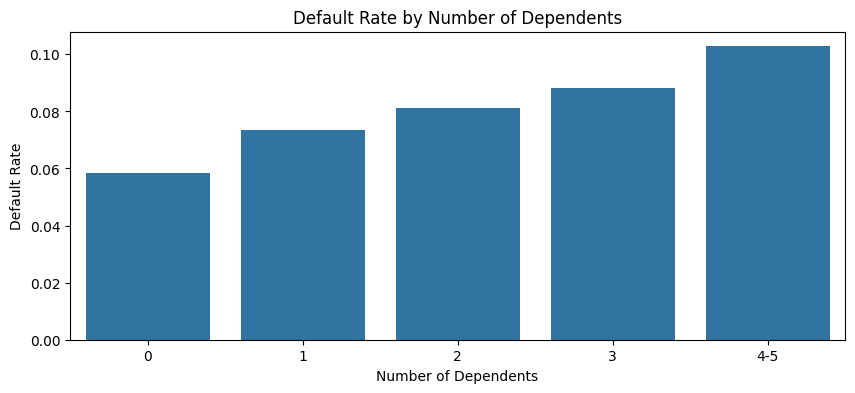

In [63]:
train['DependentsBand'] = pd.cut(train['NumberOfDependents_cleaned'],
    bins=[-1, 0, 1, 2, 3, 5],
    labels=['0','1','2','3','4-5']
)

default_rates = train.groupby('DependentsBand', observed=False)['SeriousDlqin2yrs'].mean().reset_index()

plt.figure(figsize=(10,4))
sns.barplot(x='DependentsBand', y='SeriousDlqin2yrs', data=default_rates)
plt.title('Default Rate by Number of Dependents')
plt.ylabel('Default Rate')
plt.xlabel('Number of Dependents')
plt.show()


Borrowers with no dependents often exhibit slightly lower default rates, likely reflecting fewer financial obligations.

Borrowers with more dependents show slightly higher default risk, consistent with increased financial strain.

In [64]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 44 columns):
 #   Column                                        Non-Null Count   Dtype   
---  ------                                        --------------   -----   
 0   SeriousDlqin2yrs                              149391 non-null  int64   
 1   RevolvingUtilizationOfUnsecuredLines          149391 non-null  float64 
 2   age                                           149377 non-null  float64 
 3   NumberOfTime30-59DaysPastDueNotWorse          149391 non-null  int64   
 4   DebtRatio                                     149391 non-null  float64 
 5   MonthlyIncome                                 120170 non-null  float64 
 6   NumberOfOpenCreditLinesAndLoans               149391 non-null  int64   
 7   NumberOfTimes90DaysLate                       149391 non-null  int64   
 8   NumberRealEstateLoansOrLines                  149391 non-null  int64   
 9   NumberOfTime60-89DaysPastDueNotWorse 

In [65]:
# Extracting Dataset
train.to_csv("/Users/emmanuel/Documents/Portfolio Projects/GiveMeSomeCredit/train_eda.csv", index=True)